In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing data 
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
data = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating')

In [5]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.fillna(0, inplace=True)

In [7]:
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#number of users who voted
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
#groupby - (unique values)[for the given column].agg('count'-count number of ratings)
#number of movies that were voted
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [9]:
no_user_voted.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: rating, dtype: int64

In [10]:
no_movies_voted.head()

userId
1    232
2     29
3     39
4    216
5     44
Name: rating, dtype: int64

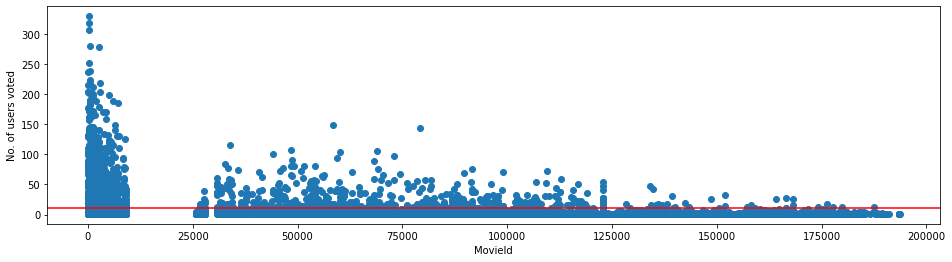

In [11]:
#graph explaining movie qualification
f,ax = plt.subplots(figsize=(16,4))
ax.scatter(no_user_voted.index,no_user_voted)
ax.axhline(10,color = 'red')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

<AxesSubplot:ylabel='Frequency'>

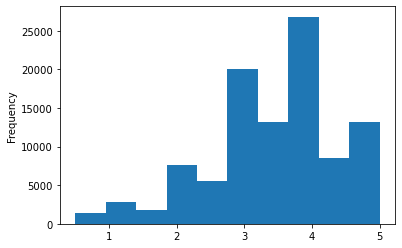

In [12]:
ratings['rating'].plot(kind='hist')

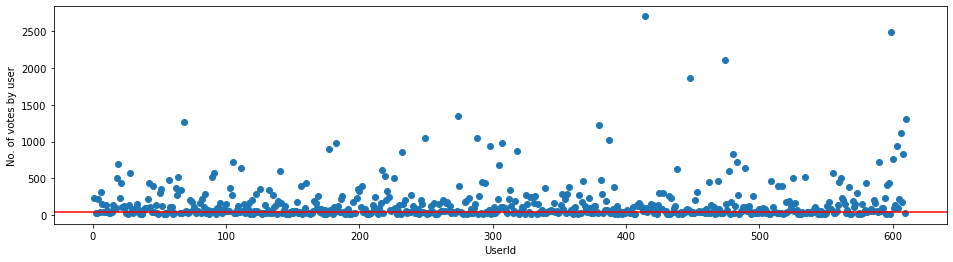

In [13]:
#graph explaining user qualification
f,ax = plt.subplots(figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted)
plt.axhline(50,color = 'red')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [14]:
#threshold-> number of users who voted a movie should  be more than 10
data = data.loc[no_user_voted[no_user_voted > 10].index,:]
#threshold-> number of votes by a particular user should be more than 50
data = data.loc[:,no_movies_voted[no_movies_voted > 50].index]

In [15]:
data.head(1)

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0


In [16]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [17]:
#removing sparsity
csr_data = csr_matrix(data.values)
data.reset_index(inplace = True)

In [18]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors = 20, n_jobs = -1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [19]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    #check whether movie name is in the movie data set
    movie_list = movies[movies['title'].str.contains(movie_name)]   
    if len(movie_list):
        #getting movie_id of the given movie
        movie_idx= movie_list.iloc[0]['movieId']
        #getting row number containing movie ratings
        movie_idx = data[data['movieId'] == movie_idx].index[0]
        #using knn algo and finding out distance and index of the nearest neighbors
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        #getting index of recommended movies(read more about this)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]  
        #create a list to add recommended movies
        recommend_frame = []
        for val in rec_movie_indices:
            #getting only the movie_id's(from index(i.e.val[0])) of recommended movies(discard user_id's)
            movie_idx = data.iloc[val[0]]['movieId']
            #getting the index of the movie_id's above in the movies data set
            #because have to get title of the movie
            idx = movies[movies['movieId'] == movie_idx].index
            #add the titles of movies and distances from above in a list(your choice to print distance or not)
            #the below line creates a dictionary insie a list
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0]})
        #put the above created list in a dataframe
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [20]:
get_movie_recommendation('Iron Man')

,Title
1,Up (2009)
2,Guardians of the Galaxy (2014)
3,Watchmen (2009)
4,Star Trek (2009)
5,Batman Begins (2005)
6,Avatar (2009)
7,Iron Man 2 (2010)
8,WALL·E (2008)
9,"Dark Knight, The (2008)"
10,"Avengers, The (2012)"


In [21]:
get_movie_recommendation('Memento')

,Title
1,American Beauty (1999)
2,American History X (1998)
3,Pulp Fiction (1994)
4,"Lord of the Rings: The Return of the King, The..."
5,Kill Bill: Vol. 1 (2003)
6,"Lord of the Rings: The Two Towers, The (2002)"
7,Eternal Sunshine of the Spotless Mind (2004)
8,"Matrix, The (1999)"
9,"Lord of the Rings: The Fellowship of the Ring,..."
10,Fight Club (1999)
